# Introduction to Recommendation Engines

In [9]:
import pandas as pd

In [10]:
ratings = pd.read_csv('user_ratings.csv')
movies = pd.read_csv('movies.csv')

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [15]:
ratings = ratings.iloc[:, :3]

In [16]:
user_ratings_df = pd.merge(ratings, movies, how="inner", on=["movieId"])

In [17]:
ratings.shape

(100836, 3)

In [18]:
user_ratings_df.shape

(100836, 5)

In [19]:
user_ratings_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Introduction to non-personalized recommendations
One of the most basic ways to make recommendations is to go with the knowledge of the crowd and recommend what is already the most popular. In this exercise, you will calculate how often each movie in the dataset has been watched and find the most frequently watched movies.

The DataFrame user_ratings_df, which is a subset of the Movie Lens dataset, has been loaded for you. This table contains identifiers for each movie and the user who watched it, along with the rating they gave it.

In [20]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()

In [21]:
# Inspect the most common values
print(movie_popularity.head().index)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object')


## Improved non-personalized recommendations

Just because a movie has been watched by a lot of people doesn't necessarily mean viewers enjoyed it. To understand how a viewer actually felt about a movie, more explicit data is useful. Thankfully, you also have ratings from each of the viewers in the Movie Lens dataset.

In this exercise, you will find the average rating of each movie in the dataset, and then find the movie with the highest average rating.

You will use the same user_ratings_df as you used in the previous exercise, which has been loaded for you.

In [22]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="rating", ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


## Combining popularity and reviews
In the past two exercises, you have used the two most common non-personalized recommendation methods to find movies to suggest. As you may have noticed, they both have their weaknesses.

Finding the most frequently watched movies will show you what has been watched, but not how people explicitly feel about it. However, finding the average of reviews has the opposite problem where we have customers' explicit feedback, but individual preferences are skewing the data.

In this exercise, you will combine the two previous methods to find the average rating only for movies that have been reviewed more than 50 times.

In [23]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings =  user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


## Finding all pairs of movies
In this exercise, you will work through how to find all pairs of movies or all permutations of pairs of movies that have been watched by the same person.

The user_ratings_df has been loaded once again containing users, and the movies they have seen.

You will need to first create a function that finds all possible pairs of items in a list it is applied to. For ease of use, you will output the values of this as a DataFrame. Since you only want to find movies that have been seen by the same person and not all possible permutations, you will group by user_id when applying the function.

In [24]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(
    find_movie_pairs).reset_index(drop=True)

In [25]:
movie_combinations

,movie_a,movie_b
0,Toy Story (1995),Grumpier Old Men (1995)
1,Toy Story (1995),Heat (1995)
2,Toy Story (1995),Seven (a.k.a. Se7en) (1995)
3,Toy Story (1995),"Usual Suspects, The (1995)"
4,Toy Story (1995),From Dusk Till Dawn (1996)
...,...,...
60793295,31 (2016),Gen-X Cops (1999)
60793296,31 (2016),Bloodmoon (1997)
60793297,31 (2016),Sympathy for the Underdog (1971)
60793298,31 (2016),Hazard (2005)


## Counting up the pairs
You can now create DataFrame of all the permutations of movies that have been watched by the same user. This is of limited use unless you can find which movies are most commonly paired.

In this exercise, you will work with the movie_combinations DataFrame that you created in the last exercise (that has been loaded for you), and generate a new DataFrame containing the counts of occurrences of each of the pairs within.

In [26]:
# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name="size").reset_index()

# Inspect the results
combination_counts_df.head()

,movie_a,movie_b,size
0,'71 (2014),(500) Days of Summer (2009),1
1,'71 (2014),10 Cloverfield Lane (2016),1
2,'71 (2014),127 Hours (2010),1
3,'71 (2014),13 Assassins (Jûsan-nin no shikaku) (2010),1
4,'71 (2014),13 Hours (2016),1


## Making your first movie recommendations

Now that you have found the most commonly paired movies, you can make your first recommendations!

While you are not taking in any information about the person watching, and do not even know any details about the movie, valuable recommendations can still be made by examining what groups of movies are watched by the same people. In this exercise, you will examine the movies often watched by the same people that watched Thor, and then use this data to give a recommendation to someone who just watched the movie. The DataFrame you generated in the last lesson, combination_counts_df, that contains counts of how often movies are watched together has been loaded for you.

In [27]:
import matplotlib.pyplot as plt

# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)

# Find the movies most frequently watched by people who watched Thor
rec_movie_df = combination_counts_df[combination_counts_df['movie_a'] == 'Dangerous Minds (1995)']

In [28]:
rec_movie_df[:10]

,movie_a,movie_b,size
5711310,Dangerous Minds (1995),Forrest Gump (1994),32
5714022,Dangerous Minds (1995),"Shawshank Redemption, The (1994)",32
5713569,Dangerous Minds (1995),Pulp Fiction (1994),31
5710223,Dangerous Minds (1995),Braveheart (1995),30
5709929,Dangerous Minds (1995),Batman (1989),28
5713976,Dangerous Minds (1995),Seven (a.k.a. Se7en) (1995),27
5714080,Dangerous Minds (1995),"Silence of the Lambs, The (1991)",25
5712221,Dangerous Minds (1995),Jurassic Park (1993),25
5709771,Dangerous Minds (1995),Apollo 13 (1995),24
5710688,Dangerous Minds (1995),Dances with Wolves (1990),24


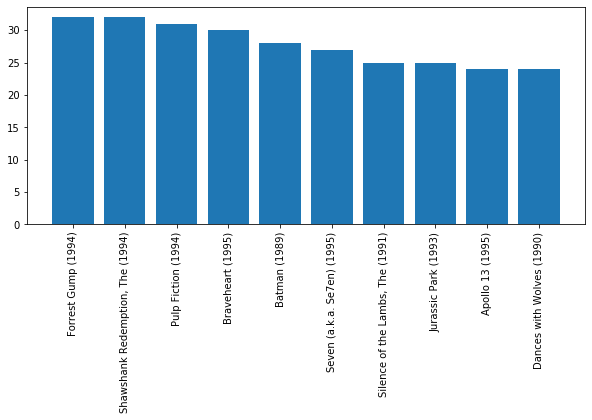

In [29]:
plt.figure(figsize=(10,4))
plt.bar(rec_movie_df[:10]['movie_b'],rec_movie_df[:10]['size'])
plt.xticks(rotation=90)
plt.show()